<a href="https://colab.research.google.com/github/ralbu85/STML/blob/main/HyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('auto.csv')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [ ]:
## One-hot Encoding
df2 = pd.get_dummies(df, columns=['origin'], dtype=int)

In [ ]:
## determine Independent/Dependent variable

y = df2['mpg'] # dependent variable
X = df2.drop(columns=['mpg']) # independent variable

## Learning Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=2) # Create the object with hyperparam
reg.fit(X,y) # Fit the model object

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'displacement <= 190.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.5, 'horsepower <= 70.5\nsquared_error = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(0.125, 0.16666666666666666, 'squared_error = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(0.375, 0.16666666666666666, 'squared_error = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(0.75, 0.5, 'horsepower <= 127.0\nsquared_error = 13.001\nsamples = 170\nvalue = 16.66'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.026\nsamples = 74\nvalue = 19.438'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.761\nsamples = 96\nvalue = 14.519')]

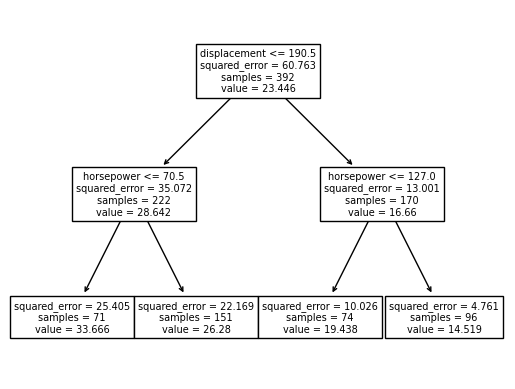

In [ ]:
from sklearn.tree import plot_tree
# X.columns
plot_tree(reg, feature_names = X.columns)

## Hyper Parameter Tuning

In [ ]:
# 1. Model Object
# 2. Data Splitter Object
# 3. Dictionary defines Hyper parameter range
# 4. Dataset (X,y)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

reg = DecisionTreeRegressor() # we make an empty object without hyper parameter specification
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
param = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[2,5,10,30]}
gcv = GridSearchCV(estimator=reg, # model
             param_grid=param, # setup hyper parameter range using dictionary
             cv = kfold, # data splitting objects
             scoring = 'r2') # scoring metrics
result = gcv.fit(X,y) # hyper parameter tuning

In [ ]:
cv_result_df = pd.DataFrame(result.cv_results_)

In [ ]:
result.best_params_, result.best_score_

({'max_depth': 6, 'min_samples_split': 10}, 0.8094196275724881)

In [ ]:
best_reg = result.best_estimator_
best_reg

DecisionTreeRegressor(max_depth=6, min_samples_split=10)

## RandomForest

In [ ]:
# 1. Model Object
# 2. Data Splitter Object
# 3. Dictionary defines Hyper parameter range
# 4. Dataset (X,y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

reg = RandomForestRegressor() # we make an empty object without hyper parameter specification
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
param = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[10,50,100,250,500]}
gcv = GridSearchCV(estimator=reg, # model
             param_grid=param, # setup hyper parameter range using dictionary
             cv = kfold, # data splitting objects
             scoring = 'r2') # scoring metrics
result = gcv.fit(X,y) # hyper parameter tuning

In [ ]:
result.best_params_, result.best_score_

({'max_depth': 9, 'n_estimators': 10}, 0.8796900790850641)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

reg = SVR() # we make an empty object without hyper parameter specification
kfold = KFold(n_splits=5, shuffle=True, random_state = 42)
param = {'kernel':['linear','rgb','sigmoid'], 'C':[0.001,0.01,0.05,0.1,1]}
gcv = GridSearchCV(estimator=reg, # model
             param_grid=param, # setup hyper parameter range using dictionary
             cv = kfold, # data splitting objects
             scoring = 'r2') # scoring metrics
result = gcv.fit(X,y) # hyper parameter tuning

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

In [ ]:
result.best_params_, result.best_score_

({'C': 0.1, 'kernel': 'linear'}, 0.8037559626991702)